#Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np #para manipular os vetores
from matplotlib import pyplot as plt #para plotar os gráficos
import seaborn as sns
import plotly as py
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans #para usar o KMeans

#Passo a Passo do k-Means
Criação do conjunto de dados exemplo 1

In [ ]:
df = pd.read_csv('/content/Consumo.csv')
df.head(5)

,Cod,Sexo,Idade,Salario Anual (milhares),Score Gastos (0-100)
0,1,Masculino,19,17,39
1,2,Masculino,21,17,81
2,3,Feminino,20,19,6
3,4,Feminino,23,19,77
4,5,Feminino,31,20,40


In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
#Análise Exporatória intuitiva
from pandas_profiling import ProfileReport

In [ ]:
#Gerando um relatório exploratório do meu dataset
profile = ProfileReport(df, title='Relatório - Consumo',html={'style':{'full_width':True}})
profile

In [ ]:
# criando um arquivo de exportação
profile.to_file(output_file='kMeans.html') 

##Questão 11

Passo a passo do K-Means
Conjunto de dados exemplo

Gráfico de dispersão


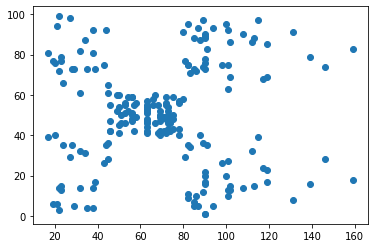

In [ ]:
plt.scatter(x = 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df)
plt.show()

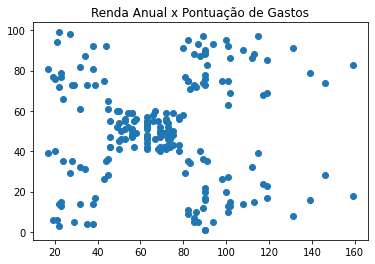

In [ ]:
#Com titulo
plt.scatter(x = 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df)
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

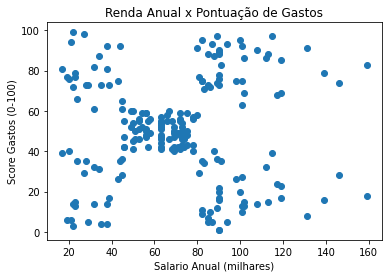

In [ ]:
#titulo no eixo
plt.scatter(x = 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df)
plt.xlabel('Salario Anual (milhares)'), plt.ylabel('Score Gastos (0-100)')
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

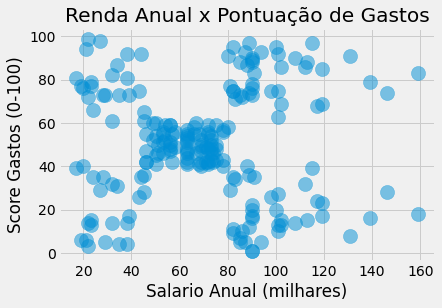

In [ ]:
#outro modelo
plt.style.use('fivethirtyeight')
plt.scatter(x = 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df, s=200, alpha=0.5)
plt.xlabel('Salario Anual (milhares)'), plt.ylabel('Score Gastos (0-100)')
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

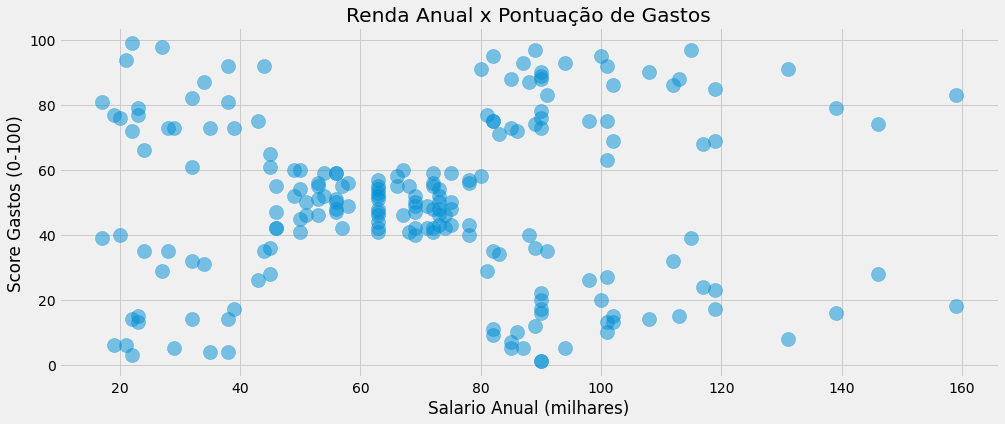

In [ ]:
#ampliando
plt.style.use('fivethirtyeight')
plt.figure(1, figsize=[15,6])
plt.scatter(x = 'Salario Anual (milhares)', y= 'Score Gastos (0-100)', data= df, s=200, alpha=0.5)
plt.xlabel('Salario Anual (milhares)'), plt.ylabel('Score Gastos (0-100)')
plt.title('Renda Anual x Pontuação de Gastos')
plt.show()

kmeans = KMeans(n_clusters = 3, #numero de clusters


init = 'k-means++', n_init = 10, #algoritmo que define a posição dos clusters 

de maneira mais assertiva


max_iter = 300) #numero máximo de iterações

pred_y = kmeans.fit_predict(dataset)


plt.scatter(dataset[:,1], dataset[:,0], c = pred_y) #posicionamento dos eixos x 

e y
plt.xlim(-75, -30) #range do eixo x


plt.ylim(-50, 10) #range do eixo y


plt.grid() #função que desenha a grade no nosso gráfico


plt.scatter(kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,0], s = 70, 

c = 'red') #posição de cada centroide no gráfico

plt.show()

In [ ]:
#busca os eixos em formato de texto
X2 = df[['Salario Anual (milhares)','Score Gastos (0-100)']].iloc[:,:].values

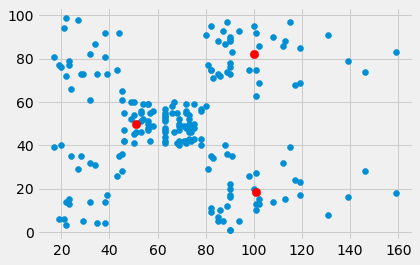

In [ ]:
#iniciando os cluster com 3 centroides
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

#executando o fit_predict
plt.scatter(X2[:,0], X2[:,1])

#plotar os centroides
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

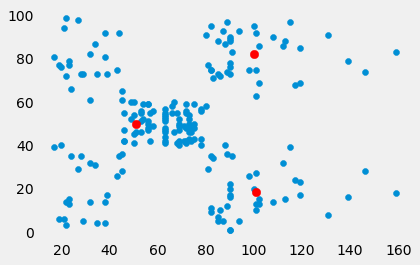

In [ ]:
#iniciando os cluster com 3 centroides
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

#executando o fit_predict
plt.scatter(X2[:,0], X2[:,1])
plt.grid()

#plotar os centroides
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

Within Cluster Sum of Squares (WCSS)-> A Soma dos quadrados das distancias: método do cotovelo.

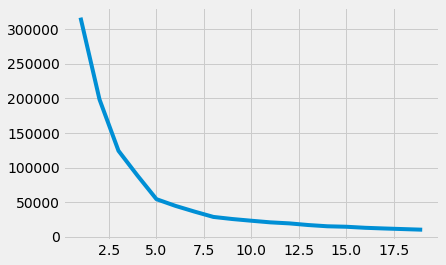

In [ ]:
#Método do cotovelo - descobre a quantidade de cluster ideal para a nossa base
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.show()

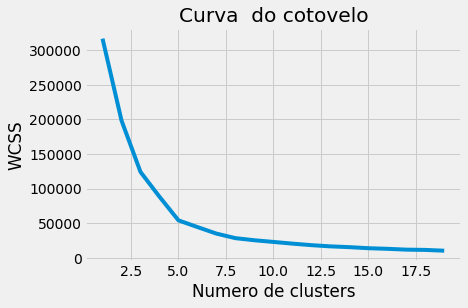

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.title('Curva  do cotovelo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

##**Questão 14**

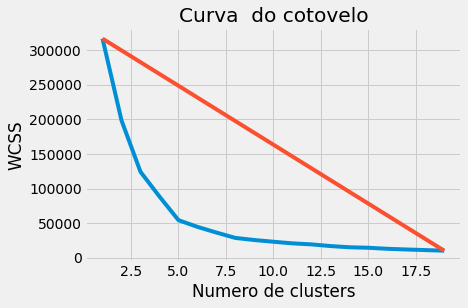

In [ ]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 20), wcss)
plt.plot([1,19],[wcss[0], wcss[len(wcss)-1]])
plt.title('Curva  do cotovelo')
plt.xlabel('Numero de clusters')
plt.ylabel('WCSS')
plt.show()

[[ 29.77272727  79.36363636]
 [ 64.09876543  49.51851852]
 [127.          82.        ]
 [ 30.43478261  20.91304348]
 [102.11428571  17.11428571]
 [ 90.93103448  82.17241379]]
44510.95061937526


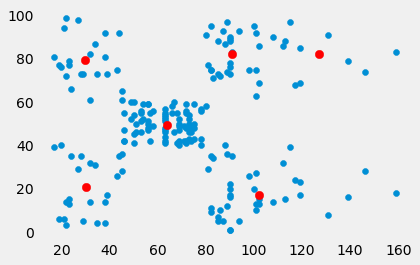

In [ ]:
#iniciando os cluster com 5 centroides

kmeans = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = kmeans.fit_predict(X2)

print(kmeans.cluster_centers_)
print(kmeans.inertia_)

#executando o fit_predict
plt.scatter(X2[:,0], X2[:,1])
plt.grid()

#plotar os centroides
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=70, c='red')
plt.show()

## **Questão 12**

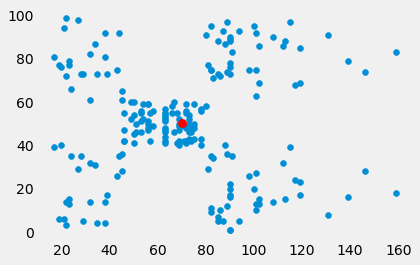

In [ ]:
# -------- iniciando os cluster com 1 centroides --------

questao12 = KMeans(n_clusters=1, init='k-means++', max_iter=300, n_init=10)
pred_y = questao12.fit_predict(X2)

#executando o fit_predict
plt.scatter(X2[:,0], X2[:,1])
plt.grid()

#plotar os centroides
plt.scatter(questao12.cluster_centers_[:,0], questao12.cluster_centers_[:,1], s=70, c='red')
plt.show()

In [ ]:
print(questao12.cluster_centers_)
print(questao12.inertia_)

[[70.14 50.2 ]]
316772.0800000001


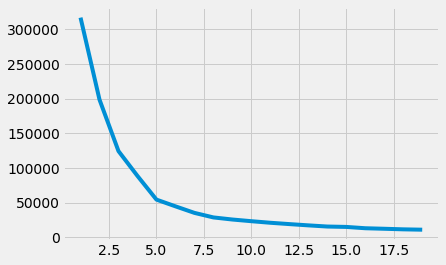

In [ ]:
#Metodo do cotovelo - descobre a quantidade de cluster ideal para a nossa base
vetor = []
for i in range(1, 20):
    questao12 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    questao12.fit(X2)
    vetor.append(questao12.inertia_)
plt.plot(range(1, 20), vetor)
plt.show()

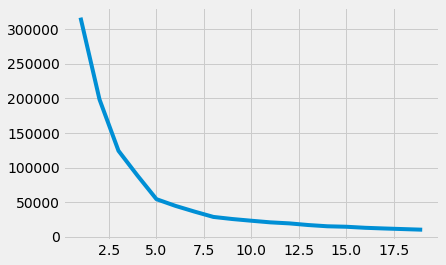

In [ ]:
#Metodo do cotovelo - descobre a quantidade de cluster ideal para a nossa base
vetor = []
for i in range(1, 20):
    questao12 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    questao12.fit(X2)
    vetor.append(questao12.inertia_)
plt.plot(range(1, 20), vetor)
plt.show()

##**Questão 13**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


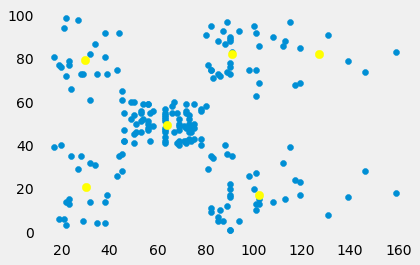

In [ ]:
# -------- iniciando os cluster com 6 centroides --------

questao13 = KMeans(n_clusters=6, init='k-means++', max_iter=300, n_init=10)
pred_y = questao13.fit_predict(X2)

#executando o fit_predict
plt.scatter(X2[:,0], X2[:,1])
plt.grid()

#plotar os centroides
plt.scatter(questao13.cluster_centers_[:,0], questao13.cluster_centers_[:,1], s=70, c=[ 1, 1, 0])
plt.show()

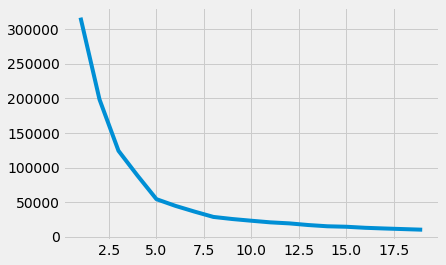

In [ ]:
#Metodo do cotovelo - descobre a quantidade de cluster ideal para a nossa base
vetor1 = []
for i in range(1, 20):
    questao13 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    questao13.fit(X2)
    vetor1.append(questao13.inertia_)
plt.plot(range(1, 20), vetor1)
plt.show()

In [ ]:
print(questao13.cluster_centers_)
print(questao13.inertia_) #O KMeans do scikit-learn já calcula o vetor

[[ 85.8         74.4       ]
 [ 69.73913043  54.69565217]
 [118.          22.57142857]
 [ 28.41666667   9.58333333]
 [ 23.7         75.6       ]
 [ 87.           6.6       ]
 [108.75        89.875     ]
 [ 26.          34.42857143]
 [ 53.52380952  53.52380952]
 [143.75        81.75      ]
 [ 70.          44.38461538]
 [106.33333333  69.83333333]
 [ 87.81818182  90.36363636]
 [148.          20.66666667]
 [ 47.54545455  39.09090909]
 [ 39.57142857  69.85714286]
 [ 31.          93.66666667]
 [ 85.66666667  34.83333333]
 [ 97.75        17.75      ]]
10045.194232940972


In [ ]:
# rodando o kmeans para nossa quantidade ótima de clusters
kmeans = KMeans(n_clusters=6)
clusters = kmeans.fit_predict(X2)

In [ ]:
clusters

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3, 5, 3,
       5, 3, 5, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)